In [3]:
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt
from math import pi, sqrt, tanh


In [4]:
from scipy.integrate import quad, nquad

def Gz(z,a,b):
    '''Direct solution to G(z), faster but has numerical instability for large V
    a=  Lb/L2
    b=  Lb*L1/L2
    '''
    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    T= (R-D**0.5 +1j*0)**(1/3)
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.abs(np.imag(z4))

def integrand(z, a, b):
    return Gz(z,a,b)*np.abs(z)

def neg_calc(a,b):
    '''Calculates logneg by \int P(z)|z| dz
    where P(z) is spectral density'''
    options={'limit':500}
    integral= nquad(integrand, [[-np.inf, np.inf]], args=(a, b),opts=[options,options])[0]
    return integral


In [10]:
def page_curve(N):
# N = 10
    Na_sw=np.arange(0,N+1,1)
    Nrep =10
    S = np.zeros(len(Na_sw))
    for i_a in range(len(Na_sw)):
        Na = Na_sw[i_a]
        Nb = N-Na
        Svals=[]
        for i_r in range(Nrep):
            #### no symmetry
            if Na< Nb:
                X=np.random.randn(2**Na,2**Nb)+1j*np.random.randn(2**Na,2**Nb)
            else:
                X=np.random.randn(2**Nb,2**Na)+1j*np.random.randn(2**Nb,2**Na)

            mat= np.dot(X,np.matrix(X).H)
            rho= mat / np.trace(mat)
            λ = np.linalg.eigvalsh(rho)
            Svals.append(-np.sum(λ*np.log2(λ)))

        S[i_a]=np.mean(np.array(Svals))
    return Na_sw, S
# plt.plot(Na_sw,S,"o-")

def rand_graph_bipartite(Na,Nb,Nrep):
    N = Na+Nb
#     Nrep=1000
    S= np.zeros(Nrep)
    n = np.zeros(min(Na,Nb)+1)
    for i_r in range(Nrep):
        n_all = np.random.permutation(N)
        a = n_all[0:Na]
        b = n_all[Na:]
    #     print(a,b)

        ent_all = np.random.permutation(N)
    #     print(ent_all)

        ent = 0
        if Na<Nb:
            for i_a in a:
                ind_a=np.argwhere(ent_all==i_a)[0][0]
                if ind_a% 2 ==0:
                    if ent_all[ind_a+1] in b:
                        ent += 1
                else:
                    if ent_all[ind_a-1] in b:
                        ent += 1
        else:
            for i_b in b:
                ind_b=np.argwhere(ent_all==i_b)[0][0]
                if ind_b% 2 ==0:
                    if ent_all[ind_b+1] in a:
                        ent += 1
                else:
                    if ent_all[ind_b-1] in a:
                        ent += 1
        S[i_r] = ent
        if min(Na,Nb)>0:
            n[ent] += 1
#     print(n)
#     if min(Na,Nb)>0:
#         n /= Nrep
#         inds = np.argwhere(n>0)[:]
# #         print(n[inds])
#         return np.mean(S)-np.sum(n[inds]*np.log2(n[inds]))
#     else:
    return np.mean(S), n
            
def rand_graph_tripartite(Na,Nb,Nc):
    N = Na+Nb+Nc
    Nrep=1000
    S= np.zeros(Nrep)
    n = np.zeros(min(Na,Nb)+1)
    for i_r in range(Nrep):
        n_all = np.random.permutation(N)
        a = n_all[0:Na]
        b = n_all[Na:Na+Nb]
        c = n_all[Na+Nb:]
#         print(a,b,c)

        ent_all = np.random.permutation(N)
#         print(ent_all)

        ent = 0
        if Na<Nb:
            for i_a in a:
                ind_a=np.argwhere(ent_all==i_a)[0][0]
                if ind_a% 2 ==0:
                    if ent_all[ind_a+1] in b:
                        ent += 1
                else:
                    if ent_all[ind_a-1] in b:
                        ent += 1
        else:
            for i_b in b:
                ind_b=np.argwhere(ent_all==i_b)[0][0]
                if ind_b% 2 ==0:
                    if ent_all[ind_b+1] in a:
                        ent += 1
                else:
                    if ent_all[ind_b-1] in a:
                        ent += 1
                        
        S[i_r]=ent
        if min(Na,Nb)>0:
            n[ent] += 1

#     if min(Na,Nb)>0:
#         n /= Nrep
#         inds = np.argwhere(n>0)[:]
#         return np.mean(S)-np.sum(n[inds]*np.log2(n[inds]))
#     else:
    return np.mean(S)

def ent_calc(p,Na,Nb):
    x = np.arange(0,min(Na,Nb)+1,2)

    f1 = p**x * comb(Na,x)*factorial(Nb)/factorial(Nb-x) 
    f2 = (1-p)**((Na-x)/2) * factorial(Na-x)/2**((Na-x)/2)/factorial((Na-x)/2) 
    f3 = (1-p)**((Nb-x)/2) * factorial(Nb-x)/2**((Nb-x)/2)/factorial((Nb-x)/2) 
    y = f1*f2*f3
    y /= sum(y)

    return sum(x*y)

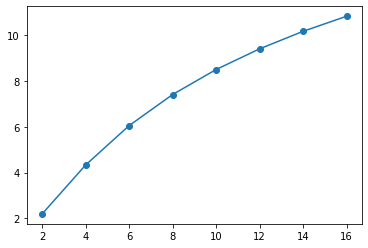

In [6]:
Na_sw=np.arange(2,18,2)
Nb=18

S = np.zeros(len(Na_sw))
for i_a in range(len(Na_sw)):
    Na = Na_sw[i_a]
    x = np.arange(0,min(Na,Nb)+1,2)

    f1 = comb(Na,x)*factorial(Nb)/factorial(Nb-x) 
    f2 = factorial(Na-x)/2**((Na-x)/2)/factorial((Na-x)/2) 
    f3 = factorial(Nb-x)/2**((Nb-x)/2)/factorial((Nb-x)/2) 
    y = f1*f2*f3
    y /= sum(y)

# plt.plot(x,y,"o-")
    S[i_a]=sum(x*y)-np.sum(y*np.log2(y))
    
plt.plot(Na_sw,S,"o-")

(0.0, 50.0)

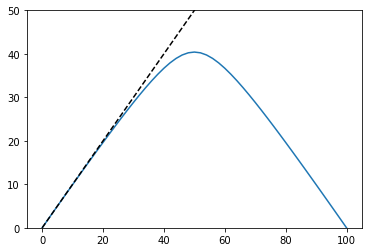

In [42]:
N = 100
Nrep = 1000
Na_sw=np.arange(0,N+1,2)
p = 0.8

S1 = np.zeros(len(Na_sw))
S2 = np.zeros(len(Na_sw))
for i_a in range(len(Na_sw)):
    Na = Na_sw[i_a]
    Nb = N-Na
#     S1[i_a],_=rand_graph_bipartite(Na,Nb,Nrep)
    S2[i_a]=ent_calc(p,Na,Nb)

plt.plot(Na_sw,S2,"-")
plt.plot(Na_sw,Na_sw,"k--")
plt.ylim([0,N/2])
# plt.plot(Na_sw,S1,"o")


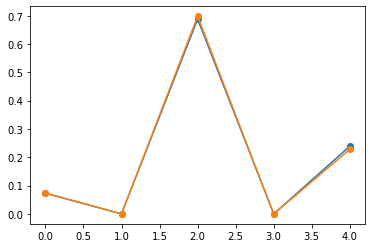

In [18]:
N = 8
Na = int(N/2)
Nb=N-Na
Nrep =1000
Savg , n_ent1=rand_graph_bipartite(Na,Nb,Nrep)

ent = []
n_ent2 = np.zeros(min(Na,Nb)+1)
i = 0
while i<Nrep:
    v1 = np.random.randint(2,size=int(N/2))
    v2 = np.random.randint(2,size=int(N/2))
    if np.sum(np.concatenate((v1,v2)))==Na:
        i += 1
        inds = np.argwhere(v1==1)[:]
#         print(v1)
#         print(v2)
        ent_val = len(inds)-np.sum(v2[inds])
        inds = np.argwhere(v1==0)[:]
        ent_val += np.sum(v2[inds])
#         print(ent_val)
        ent.append(ent_val)
        n_ent2[ent_val] += 1

plt.plot(n_ent1/Nrep,"o-")
plt.plot(n_ent2/Nrep,"o-")
